---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Merging Dataframes


In [1]:


import pandas as pd

df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

,Cost,Item Purchased,Name
Store 1,22.5,Sponge,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Spoon,Filip


In [2]:
df['Date'] = ['December 1', 'January 1', 'mid-May']
df

,Cost,Item Purchased,Name,Date
Store 1,22.5,Sponge,Chris,December 1
Store 1,2.5,Kitty Litter,Kevyn,January 1
Store 2,5.0,Spoon,Filip,mid-May


In [3]:
df['Delivered'] = True
df

,Cost,Item Purchased,Name,Date,Delivered
Store 1,22.5,Sponge,Chris,December 1,True
Store 1,2.5,Kitty Litter,Kevyn,January 1,True
Store 2,5.0,Spoon,Filip,mid-May,True


In [4]:
df['Feedback'] = ['Positive', None, 'Negative']
df

,Cost,Item Purchased,Name,Date,Delivered,Feedback
Store 1,22.5,Sponge,Chris,December 1,True,Positive
Store 1,2.5,Kitty Litter,Kevyn,January 1,True,None
Store 2,5.0,Spoon,Filip,mid-May,True,Negative


In [5]:
adf = df.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf

,index,Cost,Item Purchased,Name,Date,Delivered,Feedback
0,Store 1,22.5,Sponge,Chris,December 1,True,Positive
1,Store 1,2.5,Kitty Litter,Kevyn,NaN,True,None
2,Store 2,5.0,Spoon,Filip,mid-May,True,Negative


In [6]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
print(staff_df.head())
print()
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader

            School
Name              
James     Business
Mike           Law
Sally  Engineering


In [7]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [8]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


In [9]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [10]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


In [11]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,School
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business


In [12]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Location_x,Name,Role,Location_y,School
0,State Street,Kelly,Director of HR,NaN,NaN
1,Washington Avenue,Sally,Course liasion,512 Wilson Crescent,Engineering
2,Washington Avenue,James,Grader,1024 Billiard Avenue,Business


In [13]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
staff_df
student_df
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


# Idiomatic Pandas: Making Code Pandorable

In [14]:
import pandas as pd
df = pd.read_csv('census.csv')
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-30.953709,-5.180127,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-14.032727,-11.684234,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-6.155670,-4.611706,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,-2.731639,3.849092,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901


In [15]:
(df.where(df['SUMLEV']==50)
    .dropna()
    .set_index(['STNAME','CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}))

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County        50.0     3.0       6.0    1.0     1.0   
          Baldwin County        50.0     3.0       6.0    1.0     3.0   
          Barbour County        50.0     3.0       6.0    1.0     5.0   
          Bibb County           50.0     3.0       6.0    1.0     7.0   
          Blount County         50.0     3.0       6.0    1.0     9.0   
          Bullock County        50.0     3.0       6.0    1.0    11.0   
          Butler County         50.0     3.0       6.0    1.0    13.0   
          Calhoun County        50.0     3.0       6.0    1.0    15.0   
          Chambers County       50.0     3.0       6.0    1.0    17.0   
          Cherokee County       50.0     3.0       6.0    1.0    19.0   
          Chilton County        50.0     3.0       6.0    1.0    21.0   
          Choctaw County        50.0     3.0       6.0    1.0    23.0   
          Clarke County         50.0     3.0       6.0    1.0    25.0   
          Clay County           50.0     3.0       6.0    1.0    27.0   
          Cleburne County       50.0     3.0       6.0    1.0    29.0   
          Coffee County         50.0     3.0       6.0    1.0    31.0   
          Colbert County        50.0     3.0       6.0    1.0    33.0   
          Conecuh County        50.0     3.0       6.0    1.0    35.0   
          Coosa County          50.0     3.0       6.0    1.0    37.0   
          Covington County      50.0     3.0       6.0    1.0    39.0   
          Crenshaw County       50.0     3.0       6.0    1.0    41.0   
          Cullman County        50.0     3.0       6.0    1.0    43.0   
          Dale County           50.0     3.0       6.0    1.0    45.0   
          Dallas County         50.0     3.0       6.0    1.0    47.0   
          DeKalb County         50.0     3.0       6.0    1.0    49.0   
          Elmore County         50.0     3.0       6.0    1.0    51.0   
          Escambia County       50.0     3.0       6.0    1.0    53.0   
          Etowah County         50.0     3.0       6.0    1.0    55.0   
          Fayette County        50.0     3.0       6.0    1.0    57.0   
          Franklin County       50.0     3.0       6.0    1.0    59.0   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County       50.0     2.0       3.0   55.0   129.0   
          Washington County     50.0     2.0       3.0   55.0   131.0   
          Waukesha County       50.0     2.0       3.0   55.0   133.0   
          Waupaca County        50.0     2.0       3.0   55.0   135.0   
          Waushara County       50.0     2.0       3.0   55.0   137.0   
          Winnebago County      50.0     2.0       3.0   55.0   139.0   
          Wood County           50.0     2.0       3.0   55.0   141.0   
Wyoming   Albany County         50.0     4.0       8.0   56.0     1.0   
          Big Horn County       50.0     4.0       8.0   56.0     3.0   
          Campbell County       50.0     4.0       8.0   56.0     5.0   
          Carbon County         50.0     4.0       8.0   56.0     7.0   
          Converse County       50.0     4.0       8.0   56.0     9.0   
          Crook County          50.0     4.0       8.0   56.0    11.0   
          Fremont County        50.0     4.0       8.0   56.0    13.0   
          Goshen County         50.0     4.0       8.0   56.0    15.0   
          Hot Springs County    50.0     4.0       8.0   56.0    17.0   
          Johnson County        50.0     4.0       8.0   56.0    19.0   
          Laramie County        50.0     4.0       8.0   56.0    21.0   
          Lincoln County        50.0     4.0       8.0   56.0    23.0   
          Natrona County        50.0     4.0       8.0   56.0    25.0   
          Niobrara County       50.0     4.0       8.0   56.0    27.0   
          Park County           50.0     4.0       8.0   56.0    29.0   
          Platt

In [16]:
df = df[df['SUMLEV']==50]
df.set_index(['STNAME','CTYNAME'], inplace=True)
df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County          50       3         6      1       1   
          Baldwin County          50       3         6      1       3   
          Barbour County          50       3         6      1       5   
          Bibb County             50       3         6      1       7   
          Blount County           50       3         6      1       9   
          Bullock County          50       3         6      1      11   
          Butler County           50       3         6      1      13   
          Calhoun County          50       3         6      1      15   
          Chambers County         50       3         6      1      17   
          Cherokee County         50       3         6      1      19   
          Chilton County          50       3         6      1      21   
          Choctaw County          50       3         6      1      23   
          Clarke County           50       3         6      1      25   
          Clay County             50       3         6      1      27   
          Cleburne County         50       3         6      1      29   
          Coffee County           50       3         6      1      31   
          Colbert County          50       3         6      1      33   
          Conecuh County          50       3         6      1      35   
          Coosa County            50       3         6      1      37   
          Covington County        50       3         6      1      39   
          Crenshaw County         50       3         6      1      41   
          Cullman County          50       3         6      1      43   
          Dale County             50       3         6      1      45   
          Dallas County           50       3         6      1      47   
          DeKalb County           50       3         6      1      49   
          Elmore County           50       3         6      1      51   
          Escambia County         50       3         6      1      53   
          Etowah County           50       3         6      1      55   
          Fayette County          50       3         6      1      57   
          Franklin County         50       3         6      1      59   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County         50       2         3     55     129   
          Washington County       50       2         3     55     131   
          Waukesha County         50       2         3     55     133   
          Waupaca County          50       2         3     55     135   
          Waushara County         50       2         3     55     137   
          Winnebago County        50       2         3     55     139   
          Wood County             50       2         3     55     141   
Wyoming   Albany County           50       4         8     56       1   
          Big Horn County         50       4         8     56       3   
          Campbell County         50       4         8     56       5   
          Carbon County           50       4         8     56       7   
          Converse County         50       4         8     56       9   
          Crook County            50       4         8     56      11   
          Fremont County          50       4         8     56      13   
          Goshen County           50       4         8     56      15   
          Hot Springs County      50       4         8     56      17   
          Johnson County          50       4         8     56      19   
          Laramie County          50       4         8     56      21   
          Lincoln County          50       4         8     56      23   
          Natrona County          50       4         8     56      25   
          Niobrara County         50       4         8     56      27   
          Park County             50       4         8     56      29   
          Platt

In [19]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

In [20]:
df.apply(min_max, axis=1)

min       max
STNAME    CTYNAME                               
Alabama   Autauga County       54660.0   55347.0
          Baldwin County      183193.0  203709.0
          Barbour County       26489.0   27341.0
          Bibb County          22512.0   22861.0
          Blount County        57373.0   57776.0
          Bullock County       10606.0   10887.0
          Butler County        20154.0   20944.0
          Calhoun County      115620.0  118437.0
          Chambers County      33993.0   34153.0
          Cherokee County      25859.0   26084.0
          Chilton County       43665.0   43943.0
          Choctaw County       13170.0   13841.0
          Clarke County        24675.0   25767.0
          Clay County          13456.0   13880.0
          Cleburne County      14921.0   15072.0
          Coffee County        50177.0   51211.0
          Colbert County       54354.0   54514.0
          Conecuh County       12662.0   13208.0
          Coosa County         10724.0   11758.0
          Covington County     37796.0   38060.0
          Crenshaw County      13853.0   13963.0
          Cullman County       80374.0   82005.0
          Dale County          49501.0   50358.0
          Dallas County        41131.0   43803.0
          DeKalb County        70869.0   71387.0
          Elmore County        79465.0   81468.0
          Escambia County      37784.0   38309.0
          Etowah County       103057.0  104442.0
          Fayette County       16759.0   17231.0
          Franklin County      31507.0   31734.0
...                                ...       ...
Wisconsin Washburn County      15552.0   15930.0
          Washington County   131967.0  133674.0
          Waukesha County     390076.0  396488.0
          Waupaca County       51945.0   52422.0
          Waushara County      24033.0   24581.0
          Winnebago County    167059.0  169639.0
          Wood County          73435.0   74807.0
Wyoming   Albany County        36428.0   37956.0
          Big Horn County      11672.0   12022.0
          Campbell County      46244.0   49220.0
          Carbon County        15559.0   15856.0
          Converse County      13728.0   14343.0
          Crook County          7114.0    7444.0
          Fremont County       40222.0   41129.0
          Goshen County        13383.0   13666.0
          Hot Springs County    4741.0    4846.0
          Johnson County        8552.0    8636.0
          Laramie County       92271.0   97121.0
          Lincoln County       17943.0   18722.0
          Natrona County       75472.0   82178.0
          Niobrara County       2475.0    2548.0
          Park County          28259.0   29237.0
          Platte County         8678.0    8812.0
          Sheridan County      29146.0   30020.0
          Sublette County       9899.0   10418.0
          Sweetwater County    43593.0   45162.0
          Teton County         21297.0   23125.0
          Uinta County         20822.0   21102.0
          Washakie County       8316.0    8545.0
          Weston County         7065.0    7234.0

[3142 rows x 2 columns]

In [21]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row
df.apply(min_max, axis=1)

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County        50.0     3.0       6.0    1.0     1.0   
          Baldwin County        50.0     3.0       6.0    1.0     3.0   
          Barbour County        50.0     3.0       6.0    1.0     5.0   
          Bibb County           50.0     3.0       6.0    1.0     7.0   
          Blount County         50.0     3.0       6.0    1.0     9.0   
          Bullock County        50.0     3.0       6.0    1.0    11.0   
          Butler County         50.0     3.0       6.0    1.0    13.0   
          Calhoun County        50.0     3.0       6.0    1.0    15.0   
          Chambers County       50.0     3.0       6.0    1.0    17.0   
          Cherokee County       50.0     3.0       6.0    1.0    19.0   
          Chilton County        50.0     3.0       6.0    1.0    21.0   
          Choctaw County        50.0     3.0       6.0    1.0    23.0   
          Clarke County         50.0     3.0       6.0    1.0    25.0   
          Clay County           50.0     3.0       6.0    1.0    27.0   
          Cleburne County       50.0     3.0       6.0    1.0    29.0   
          Coffee County         50.0     3.0       6.0    1.0    31.0   
          Colbert County        50.0     3.0       6.0    1.0    33.0   
          Conecuh County        50.0     3.0       6.0    1.0    35.0   
          Coosa County          50.0     3.0       6.0    1.0    37.0   
          Covington County      50.0     3.0       6.0    1.0    39.0   
          Crenshaw County       50.0     3.0       6.0    1.0    41.0   
          Cullman County        50.0     3.0       6.0    1.0    43.0   
          Dale County           50.0     3.0       6.0    1.0    45.0   
          Dallas County         50.0     3.0       6.0    1.0    47.0   
          DeKalb County         50.0     3.0       6.0    1.0    49.0   
          Elmore County         50.0     3.0       6.0    1.0    51.0   
          Escambia County       50.0     3.0       6.0    1.0    53.0   
          Etowah County         50.0     3.0       6.0    1.0    55.0   
          Fayette County        50.0     3.0       6.0    1.0    57.0   
          Franklin County       50.0     3.0       6.0    1.0    59.0   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County       50.0     2.0       3.0   55.0   129.0   
          Washington County     50.0     2.0       3.0   55.0   131.0   
          Waukesha County       50.0     2.0       3.0   55.0   133.0   
          Waupaca County        50.0     2.0       3.0   55.0   135.0   
          Waushara County       50.0     2.0       3.0   55.0   137.0   
          Winnebago County      50.0     2.0       3.0   55.0   139.0   
          Wood County           50.0     2.0       3.0   55.0   141.0   
Wyoming   Albany County         50.0     4.0       8.0   56.0     1.0   
          Big Horn County       50.0     4.0       8.0   56.0     3.0   
          Campbell County       50.0     4.0       8.0   56.0     5.0   
          Carbon County         50.0     4.0       8.0   56.0     7.0   
          Converse County       50.0     4.0       8.0   56.0     9.0   
          Crook County          50.0     4.0       8.0   56.0    11.0   
          Fremont County        50.0     4.0       8.0   56.0    13.0   
          Goshen County         50.0     4.0       8.0   56.0    15.0   
          Hot Springs County    50.0     4.0       8.0   56.0    17.0   
          Johnson County        50.0     4.0       8.0   56.0    19.0   
          Laramie County        50.0     4.0       8.0   56.0    21.0   
          Lincoln County        50.0     4.0       8.0   56.0    23.0   
          Natrona County        50.0     4.0       8.0   56.0    25.0   
          Niobrara County       50.0     4.0       8.0   56.0    27.0   
          Park County           50.0     4.0       8.0   56.0    29.0   
          Platt

In [22]:
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']
df.apply(lambda x: np.max(x[rows]), axis=1)

STNAME     CTYNAME           
Alabama    Autauga County         55347.0
           Baldwin County        203709.0
           Barbour County         27341.0
           Bibb County            22861.0
           Blount County          57776.0
           Bullock County         10887.0
           Butler County          20944.0
           Calhoun County        118437.0
           Chambers County        34153.0
           Cherokee County        26084.0
           Chilton County         43943.0
           Choctaw County         13841.0
           Clarke County          25767.0
           Clay County            13880.0
           Cleburne County        15072.0
           Coffee County          51211.0
           Colbert County         54514.0
           Conecuh County         13208.0
           Coosa County           11758.0
           Covington County       38060.0
           Crenshaw County        13963.0
           Cullman County         82005.0
           Dale County            50358.0
    

# Group by

In [23]:
import pandas as pd
import numpy as np
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-30.953709,-5.180127,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-14.032727,-11.684234,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-6.155670,-4.611706,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,-2.731639,3.849092,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901
10,50,3,6,1,19,Alabama,Cherokee County,25989,25986,25976,...,6.339327,1.113180,5.488706,-0.076806,-3.239866,6.416167,1.420264,5.757384,0.230419,-2.931307


In [ ]:
%%timeit -n 10
for state in df['STNAME'].unique():
    avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])
    print('Counties in state ' + state + ' have an average population of ' + str(avg))

In [ ]:
%%timeit -n 10
for group, frame in df.groupby('STNAME'):
    avg = np.average(frame['CENSUS2010POP'])
    print('Counties in state ' + group + ' have an average population of ' + str(avg))

In [24]:
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [25]:
df = df.set_index('STNAME')

def fun(item):
    if item[0]<'M':
        return 0
    if item[0]<'Q':
        return 1
    return 2

for group, frame in df.groupby(fun):
    print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')


There are 1177 records in group 0 for processing.
There are 1134 records in group 1 for processing.
There are 831 records in group 2 for processing.


In [26]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]

In [27]:
df.groupby('STNAME').agg({'CENSUS2010POP': np.average})

,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207
Colorado,78581.187500
Connecticut,446762.125000
Delaware,299311.333333
District of Columbia,601723.000000


In [ ]:
print(df.groupby('Category').apply(lambda df,a,b: sum(df[a] * df[b]), 'Weight (oz.)', 'Quantity'))


# Or alternatively without using a lambda:
# def totalweight(df, w, q):
#        return sum(df[w] * df[q])
#        
# print(df.groupby('Category').apply(totalweight, 'Weight (oz.)', 'Quantity'))

In [ ]:
print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']))
print(type(df.groupby(level=0)['POPESTIMATE2010']))

In [ ]:
(df.set_index('STNAME').groupby(level=0)['CENSUS2010POP']
    .agg({'avg': np.average, 'sum': np.sum}))

In [ ]:
#level=0 -> Index

(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'avg': np.average, 'sum': np.sum}))

In [ ]:
#When using the agg function, if the keys are columns, the function will be mapped only to that column. If not, it will map the function to all columns


(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'POPESTIMATE2010': np.average, 'POPESTIMATE2011': np.sum}))

# Scales

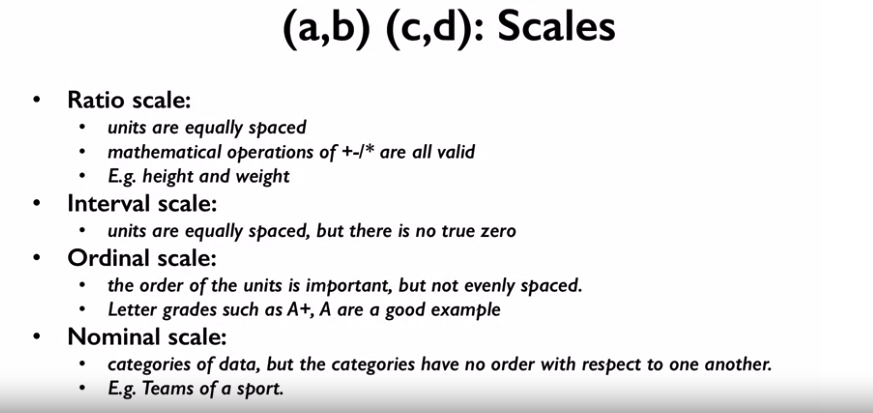

In [31]:
from IPython.display import Image
i = Image(filename='scales.png')
i

In [32]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [33]:
df['Grades'].astype('category').head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [34]:
grades = df['Grades'].astype('category',
                             categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
                             ordered=True)
grades.head()

/Users/Tanya/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [D < D+ < C- < C ... B+ < A- < A < A+]

In [35]:
grades > 'C'

excellent     True
excellent     True
excellent     True
good          True
good          True
good          True
ok            True
ok           False
ok           False
poor         False
poor         False
Name: Grades, dtype: bool

In [ ]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df = df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg({'avg': np.average})
pd.cut(df['avg'],10)

In [44]:
s = pd.Series([168, 180, 174, 190, 170, 185, 179, 181, 175, 169, 182, 177, 180, 171])


pd.cut(s, 3)

# You can also add labels for the sizes [Small < Medium < Large].
pd.cut(s, 3, labels=['Small', 'Medium', 'Large'])

0      Small
1     Medium
2      Small
3      Large
4      Small
5      Large
6     Medium
7     Medium
8      Small
9      Small
10    Medium
11    Medium
12    Medium
13     Small
dtype: category
Categories (3, object): [Small < Medium < Large]

# Pivot Tables

In [48]:
#http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64
df = pd.read_csv('cars.csv')

In [49]:
df.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


In [50]:
#default of aggfunc is mean
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)

Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN
2013,NaN,NaN,107.0,NaN,49.0,80.0,35.0,280.000000
2014,NaN,104.0,107.0,NaN,49.0,80.0,35.0,268.333333
2015,125.0,104.0,107.0,81.0,49.0,80.0,35.0,320.666667
2016,125.0,104.0,107.0,81.0,49.0,80.0,35.0,409.700000


In [52]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean,np.min], margins=True)

mean                                                             \
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART       TESLA   
YEAR                                                                     
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN         NaN   
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  280.000000   
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  268.333333   
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  320.666667   
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  409.700000   
All   125.0     104.0  107.0  81.0       49.0   80.0  35.0  345.478261   

                   amin                                                        \
Make         All    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART  TESLA   
YEAR                                                                            
2012   64.500000    NaN       NaN    NaN   NaN       49.0   80.0   NaN    NaN   
2013  158.444444    NaN       NaN  107.0   NaN       49.0   80.0  35.0  270.0   
2014  135.000000    NaN     104.0  107.0   NaN       49.0   80.0  35.0  225.0   
2015  181.428571  125.0     104.0  107.0  81.0       49.0   80.0  35.0  280.0   
2016  252.263158  125.0     104.0  107.0  81.0       49.0   80.0  35.0  283.0   
All   190.622642  125.0     104.0  107.0  81.0       49.0   80.0  35.0  225.0   

          
Make All  
YEAR      
2012  49  
2013  35  
2014  35  
2015  35  
2016  35  
All   35

# Date Functionality in Pandas

In [53]:
import pandas as pd
import numpy as np

#4 main classes - datetime index, timestamp, period, period index

### Timestamp

In [54]:
pd.Timestamp('9/1/2016 10:05AM')

Timestamp('2016-09-01 10:05:00')

### Period

In [55]:
#Period-single time span
pd.Period('1/2016')

Period('2016-01', 'M')

In [56]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

### DatetimeIndex

In [57]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [58]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

### PeriodIndex

In [59]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [60]:
type(t2.index)

pandas.core.indexes.period.PeriodIndex

### Converting to Datetime

In [61]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,35,99
"Aug 29, 2014",82,56
2015-06-26,41,75
7/12/16,32,74


In [62]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,35,99
2014-08-29,82,56
2015-06-26,41,75
2016-07-12,32,74


In [63]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

### Timedeltas

In [64]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [65]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

### Working with Dates in a Dataframe

In [66]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [67]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,97,123
2016-10-16,98,120
2016-10-30,96,122
2016-11-13,100,119
2016-11-27,108,115
2016-12-11,116,124
2016-12-25,112,119
2017-01-08,111,125
2017-01-22,114,126


In [68]:
df.index.weekday_name

Index(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday'],
      dtype='object')

In [69]:
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,1.0,-3.0
2016-10-30,-2.0,2.0
2016-11-13,4.0,-3.0
2016-11-27,8.0,-4.0
2016-12-11,8.0,9.0
2016-12-25,-4.0,-5.0
2017-01-08,-1.0,6.0
2017-01-22,3.0,1.0


In [70]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,97.0,121.666667
2016-11-30,104.0,117.000000
2016-12-31,114.0,121.500000
2017-01-31,112.5,125.500000


In [71]:
df['2017']

,Count 1,Count 2
2017-01-08,111,125
2017-01-22,114,126


In [72]:
df['2016-12']

,Count 1,Count 2
2016-12-11,116,124
2016-12-25,112,119


In [73]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,116,124
2016-12-25,112,119
2017-01-08,111,125
2017-01-22,114,126


In [74]:
df.asfreq('W', method='ffill')

,Count 1,Count 2
2016-10-02,97,123
2016-10-09,97,123
2016-10-16,98,120
2016-10-23,98,120
2016-10-30,96,122
2016-11-06,96,122
2016-11-13,100,119
2016-11-20,100,119
2016-11-27,108,115
2016-12-04,108,115


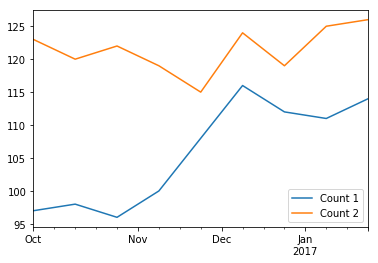

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()